<a href="https://colab.research.google.com/github/Bredalis/Cats-And-Dogs-Classification/blob/master/Cats_And_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clasificador de gatos y perros

# Librerías
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import kagglehub
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

In [2]:
# Preparación de los datos

dataset = kagglehub.dataset_download("marquis03/cats-and-dogs")

# Procesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset + "/train",
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "binary",
    subset = "training"
)

val_generator = train_datagen.flow_from_directory(
    dataset + "/val",
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)

100%|██████████| 9.75M/9.75M [00:00<00:00, 11.9MB/s]

Extracting files...


Found 220 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [3]:
# Creación del modelo

model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation="relu", input_shape = (150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPool2D(2, 2),

    # Convertir mapas de características en un vector
    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compilar el modelo
model.compile(
  loss="binary_crossentropy",
  optimizer="adam",
  metrics=["accuracy"]
)

In [5]:
# Entrenamiento

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 820ms/step - accuracy: 0.4748 - loss: 0.7820 - val_accuracy: 0.6923 - val_loss: 0.6386
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.6528 - loss: 0.6627 - val_accuracy: 0.6923 - val_loss: 0.6287
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.6362 - loss: 0.6423 - val_accuracy: 0.6923 - val_loss: 0.6119
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.6144 - loss: 0.6653 - val_accuracy: 0.6923 - val_loss: 0.5856
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.6272 - loss: 0.6418 - val_accuracy: 0.6923 - val_loss: 0.5992
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.6294 - loss: 0.6201 - val_accuracy: 0.6923 - val_loss: 0.5966
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6587 - loss: 0.5891 - val_accuracy: 0.6923 - val_loss: 0.6329
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6073 - loss: 0.6021 - val_accuracy: 0.6923 - val_loss

In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

None


In [7]:
# Predicciones

import os
print(os.listdir(dataset))

val_cat = os.listdir(dataset + "/val/cat")
val_dog = os.listdir(dataset + "/val/dog")

val_cat = [dataset + "/val/cat/" + i for i in val_cat]
val_dog = [dataset + "/val/dog/" + i for i in val_dog]

for i, j in zip(val_cat, val_dog):
  print(f"{i} - {j}")


['val.csv', 'val', 'train.csv', 'train']
/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Sphynx_104_jpg.rf.e7cb65a6212f786130b1bf1bf6d114a1.jpg - /root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/dog/leonberger_127_jpg.rf.e546fb18911f0ae5a4b31fcf630db158.jpg
/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/British_Shorthair_195_jpg.rf.f338b5af77fd01ce53bb348b8a45be94.jpg - /root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/dog/wheaten_terrier_126_jpg.rf.dd7608adea9a374c47c3f9e26567f6a9.jpg
/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Siamese_158_jpg.rf.fad9e8f3a0a6866d0f9b5adc3953b876.jpg - /root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/dog/wheaten_terrier_11_jpg.rf.ed99f8bfe7d4f1a90a5fdfcb02f002ec.jpg
/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Ragdoll_158_jpg.rf.f9c36ee093139d00405f4f0838dd00d8.jpg - /root/.

In [8]:
val_cat_example = random.sample(val_cat, 8)
val_dog_example = random.sample(val_dog, 8)
imgs = val_cat_example + val_dog_example
imgs = random.sample(imgs, 8)

print(imgs)

['/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Siamese_145_jpg.rf.ec625542af775a512cead881f6047ff7.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Ragdoll_179_jpg.rf.ea82d93718e6994d7c36c2dba763e460.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/dog/yorkshire_terrier_106_jpg.rf.d6f3d2d3861cfdb0b43daab736c5c3d7.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Birman_132_jpg.rf.f5445061871c56755fa4365aa6c89433.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/dog/miniature_pinscher_178_jpg.rf.cc5dfb4cdc0886a89b0cb12f161185df.jpg', '/root/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2/val/cat/Birman_163_jpg.rf.de852821da3d65ebd26216dcfb51dd99.jpg', '/root/.cache/kagglehub/datasets/marqui

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
0.69047874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.9999472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.9999877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.6739392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.25874916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.99911577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0.99593425


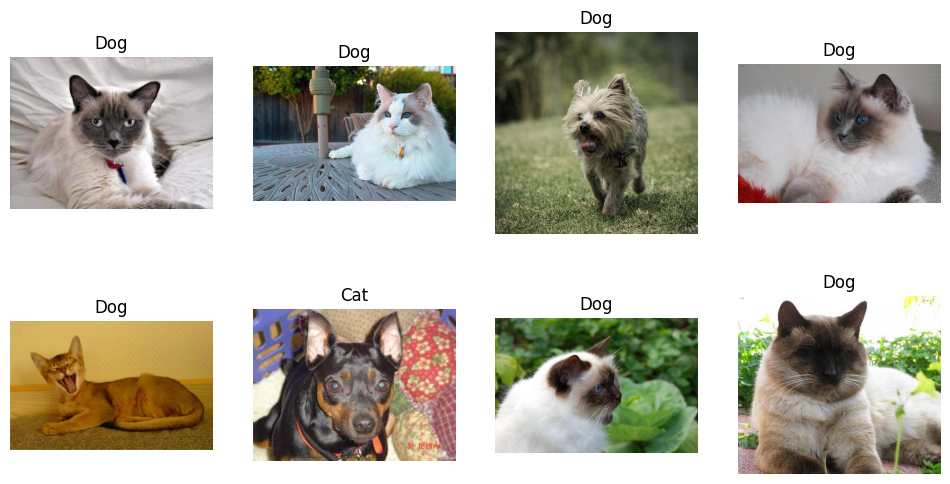

In [9]:
# Gráfica con los resultados de clasificación

# Crear figura de 2 filas x 4 columnas
plt.figure(figsize=(12, 6))

for i in range(8):

  img = image.load_img(imgs[i], target_size=(150, 150))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis = 0)

  pred = model.predict(img_array)
  print(pred[0][0])

  plt.subplot(2, 4, i + 1)
  plt.imshow(mpimg.imread(imgs[i]))
  plt.title("Dog" if pred[0][0] > 0.5 else "Cat")
  plt.axis("off")

plt.show()